<a href="https://colab.research.google.com/github/aaryaman11/cs480student/blob/main/05/Copy_of_CS480_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

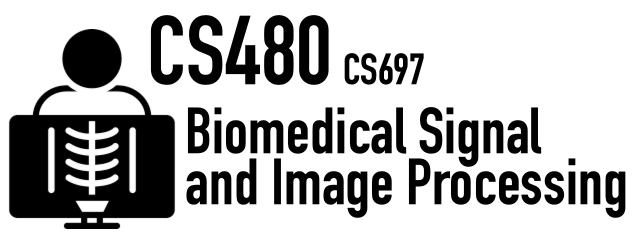
#Assignment 5

In [4]:
# In this assignment, we will visualize and explore a CT scan!

In [7]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
# we are using pydicom, so lets install it!
!pip install pydicom

**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [ ]:
# TODO: YOUR_ANSWER

There are a total of 220 slices

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

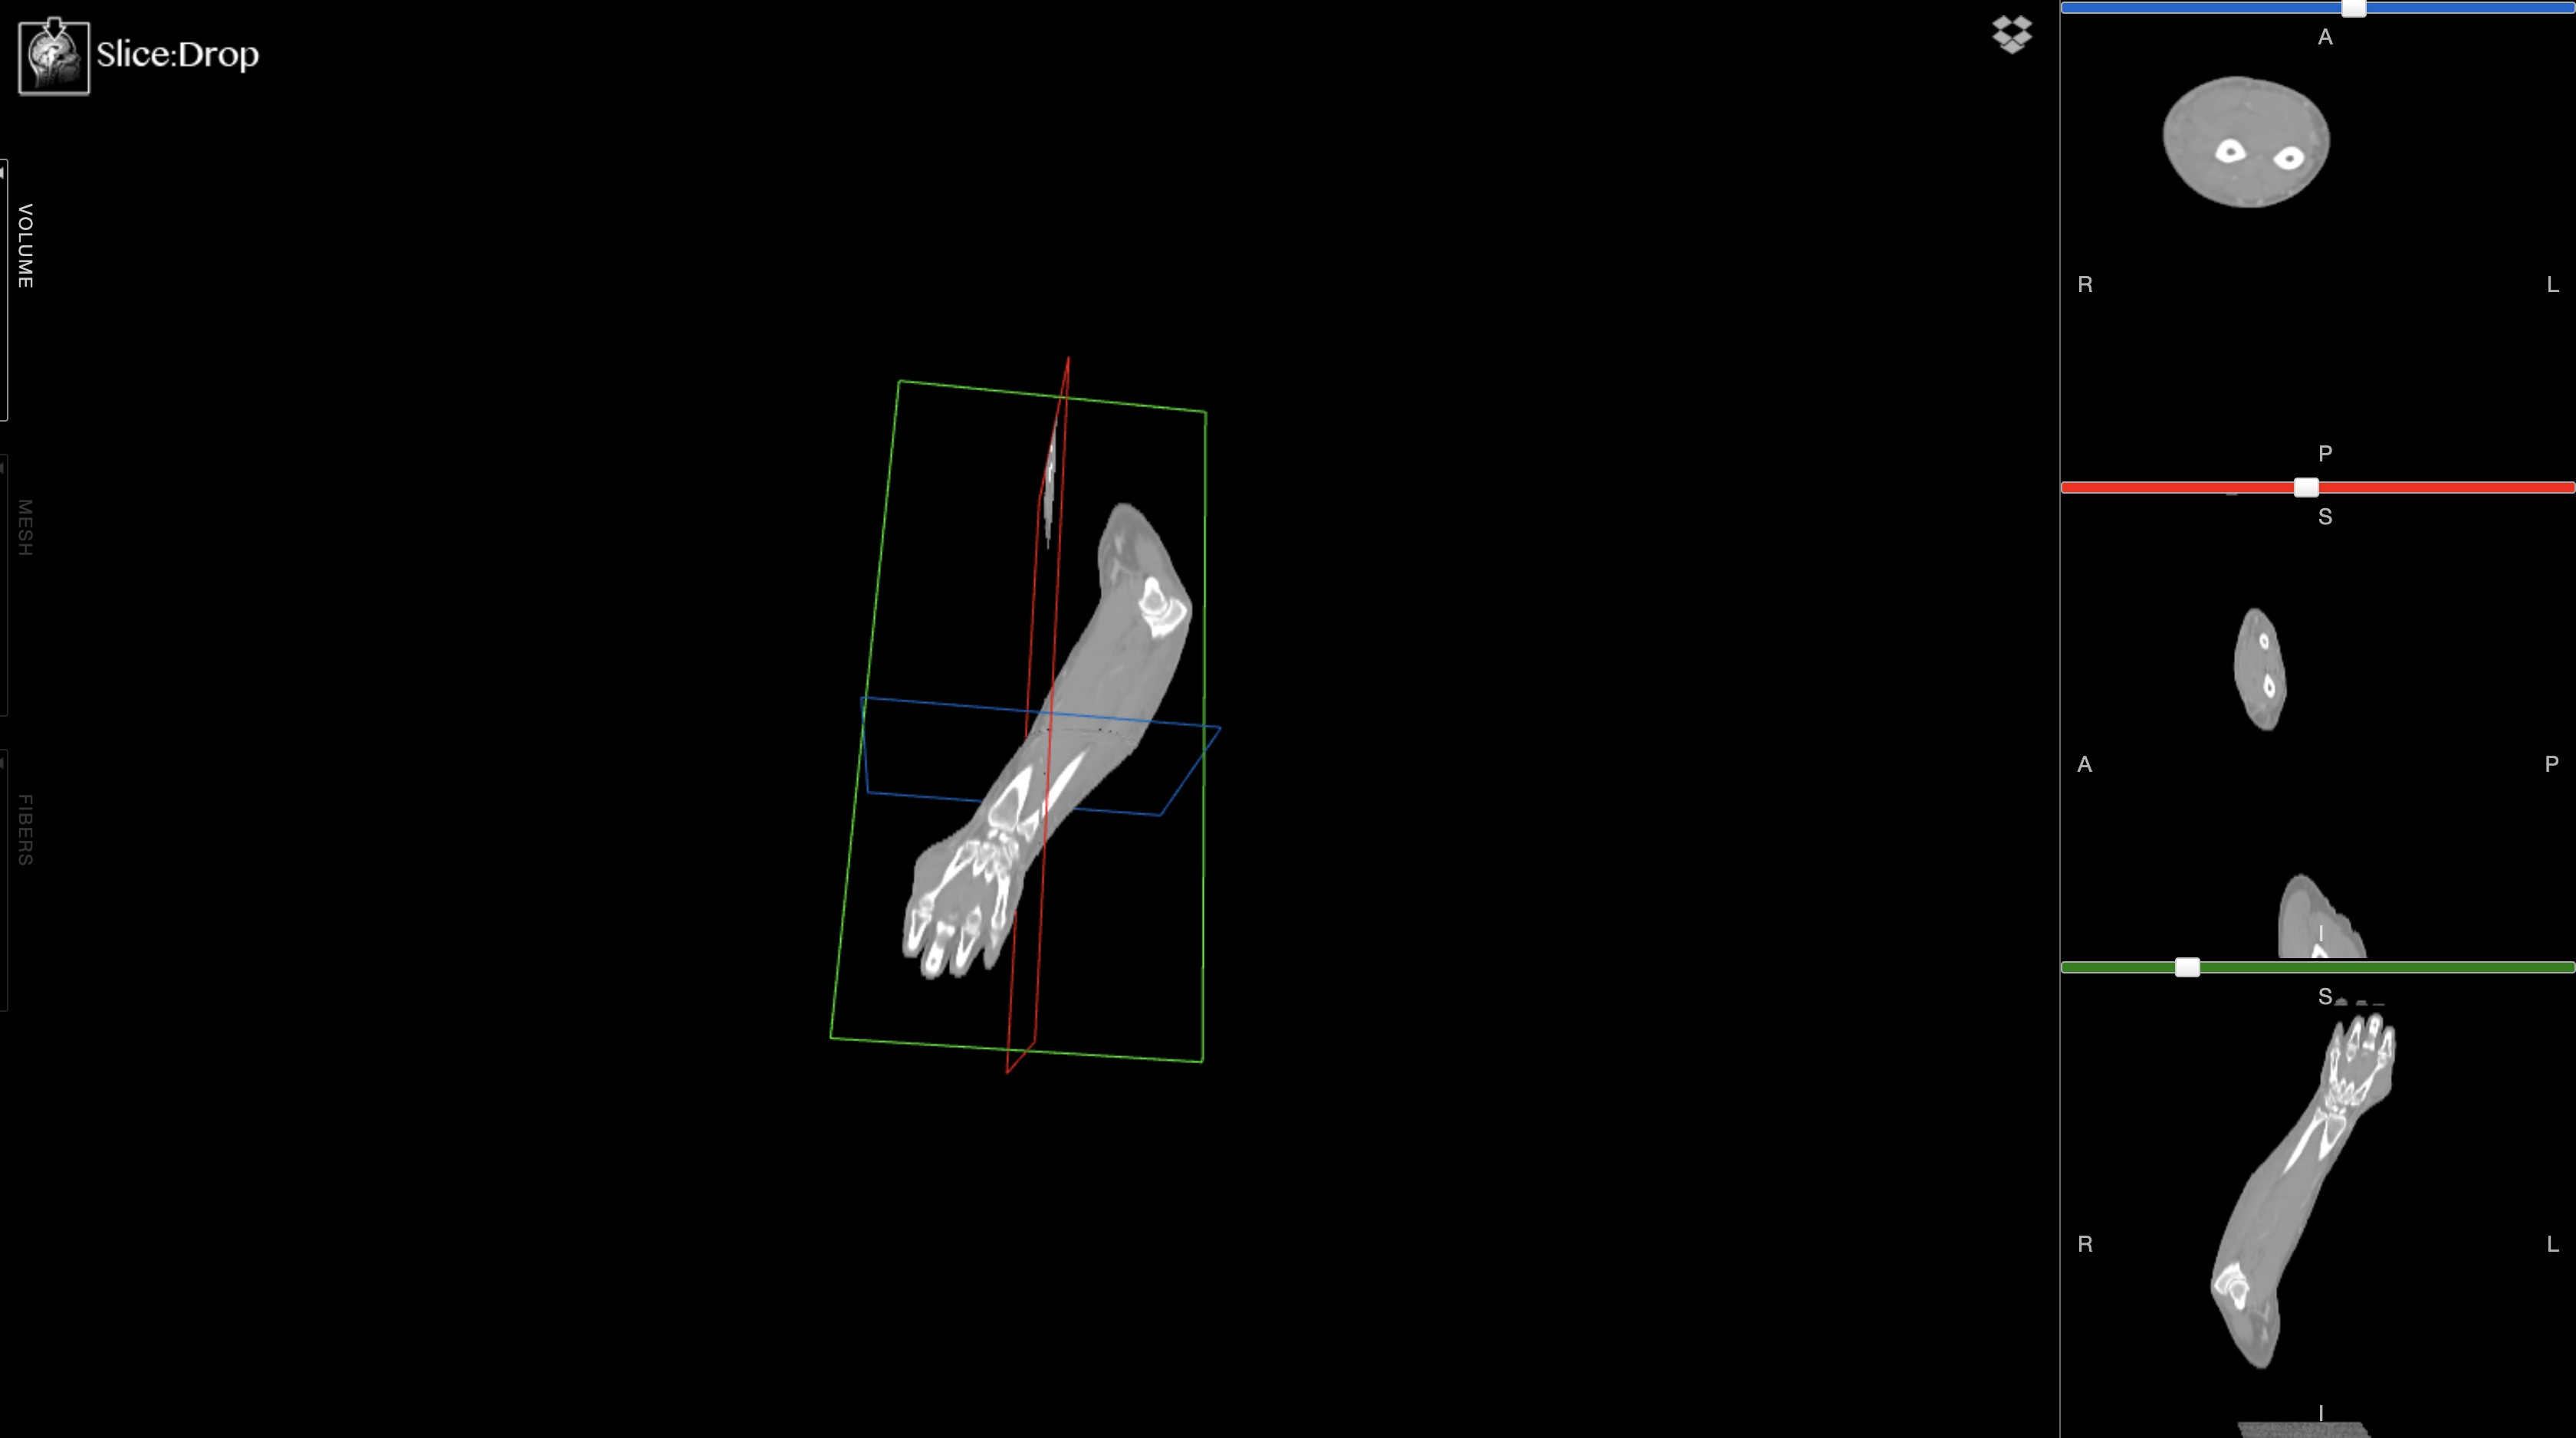

3D view of slice drop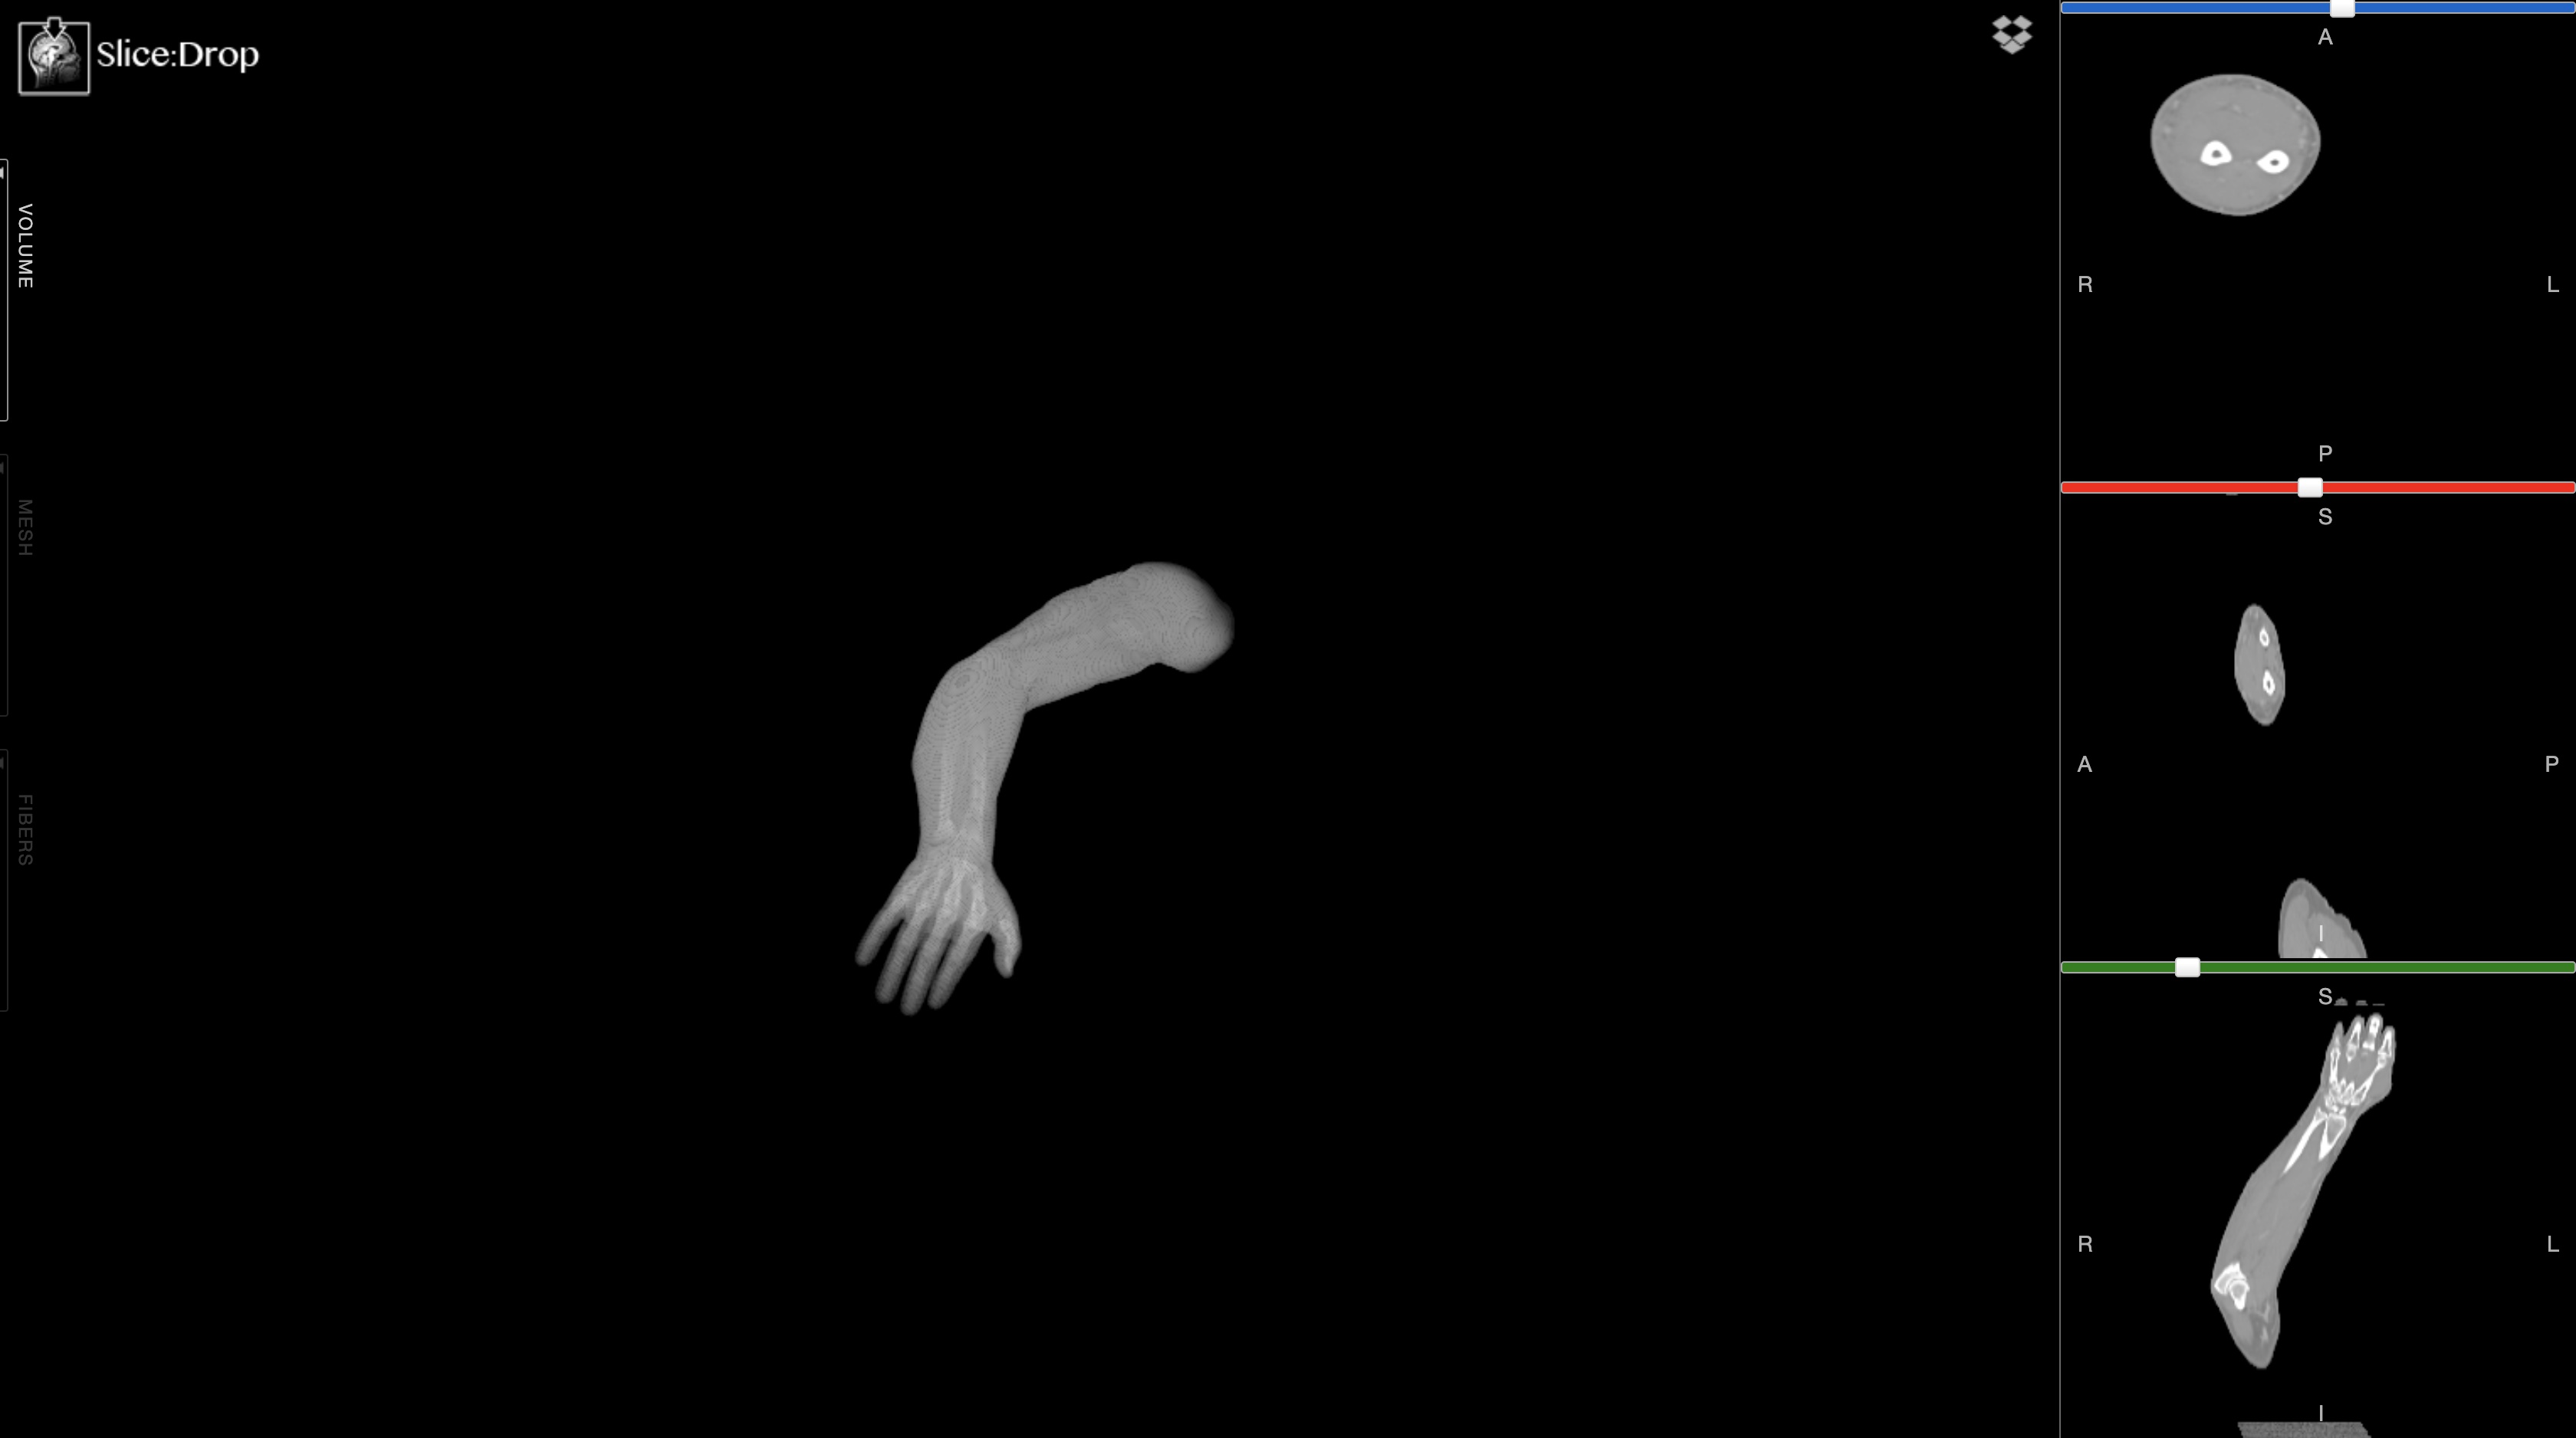

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [8]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [9]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [12]:
from pydicom import dcmread
import os

In [23]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
# use ishawagh19  code as an insspiration to fix my code  
Dicom_files = os.listdir('ct')
Dicom_files.sort()
number_of_files = len(Dicom_files)
read_slice = dcmread('ct/' + Dicom_files[0])                
dimension = list(read_slice.pixel_array.shape) 
dimension.append(number_of_files)
print(dimension) 
# 3d numpy array
array_3d = np.zeros(dimension, dtype=float) 

for i in range(0, number_of_files):  
  slices = dcmread('ct/'+ Dicom_files[i]).pixel_array
  array_3d[:,:,i] = slices

[454, 512, 220]


In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

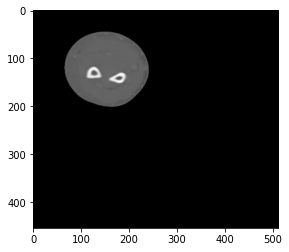

In [24]:
# TODO: YOUR CODE FOR AXIAL
plt.imshow(array_3d[:, :, dimension[2]//2], cmap='gray')

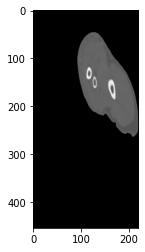

In [25]:
# TODO: YOUR CODE FOR SAGITTAL
plt.imshow(array_3d[:, dimension[2]//2, :], cmap='gray')

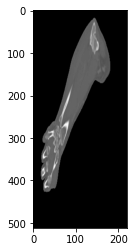

In [26]:
# TODO: YOUR CODE FOR CORONAL
plt.imshow(array_3d[dimension[2]//2, :, :], cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [30]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [29]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.


 Level 		 : 30
 Window center	 : 410
 Rescale  		 : -1024

 vmin  	  : -175.0
 vmax  	  : 235.0


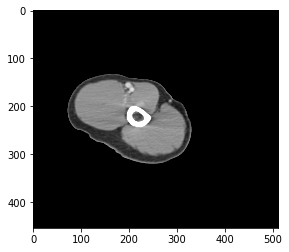

In [37]:
# TODO: YOUR CODE
# took help from ishawagh19 code
im_slice = dcmread('ct/' + Dicom_files[200])  
level = im_slice['WindowCenter'].value
window_center = im_slice['WindowWidth'].value
rescale = im_slice['RescaleIntercept'].value
print("\n Level \t\t :", level)     
print(" Window center\t :", window_center)  
print(" Rescale  \t\t :", rescale)  

vmin = level - window_center/2
vmax = level + window_center/2
print("\n vmin  \t  :", vmin)
print(" vmax  \t  :", vmax)

pixels = im_slice.pixel_array
plt.imshow(pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()


In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.


 vmin  	  : -170.0
 vmax  	  : 240.0


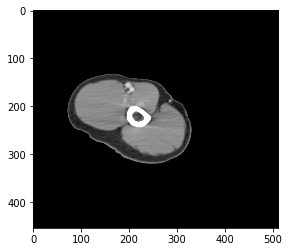

In [41]:
# TODO: YOUR CODE
level = 35
window = 75

vmin=level - window_center/2
vmax=level + window_center/2
print("\n vmin  \t  :", vmin)
print(" vmax  \t  :", vmax)

plt.imshow(pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()



 vmin  	  : -205.0
 vmax  	  : 205.0


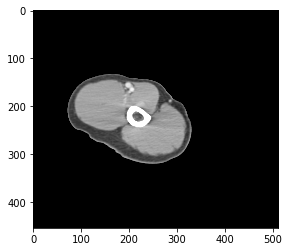

In [42]:
level = 0
window = 80

vmin=level - window_center/2
vmax=level + window_center/2
print("\n vmin  \t  :", vmin)
print(" vmax  \t  :", vmax)

plt.imshow(pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()


 vmin  	  : -105.0
 vmax  	  : 305.0


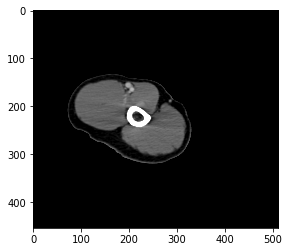

In [44]:
level = 100
window = 500

vmin=level - window_center/2
vmax=level + window_center/2
print("\n vmin  \t  :", vmin)
print(" vmax  \t  :", vmax)

plt.imshow(pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()


 vmin  	  : -305.0
 vmax  	  : 105.0


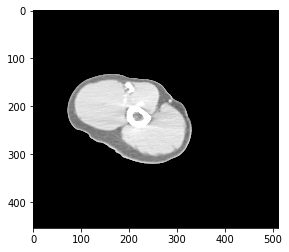

In [47]:
level = -100
window = 700

vmin=level - window_center/2
vmax=level + window_center/2
print("\n vmin  \t  :", vmin)
print(" vmax  \t  :", vmax)

plt.imshow(pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()


 vmin  	  : 295.0
 vmax  	  : 705.0


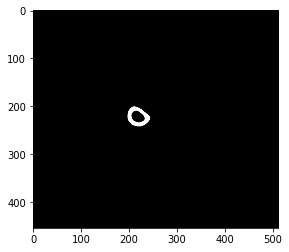

In [64]:
level = 500
window = 1000

vmin=level - window_center/2
vmax=level + window_center/2
print("\n vmin  \t  :", vmin)
print(" vmax  \t  :", vmax)

plt.imshow(pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER

for level the value above 500 and window value even being 0 only focuses on the bone, while lower values of level and window are showing soft tissue 

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

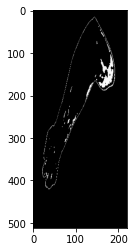

In [71]:
# TODO: YOUR CODE TO SEGMENT FAT
new_m = array_3d[120].copy().astype(np.int16)
new_m[new_m < -100] = 0
new_m[new_m > 950] = 0
plt.imshow(new_m, cmap='gray')
plt.show()

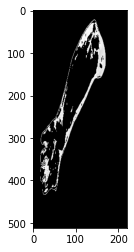

In [68]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
new_m = array_3d[100].copy().astype(np.int16)
new_m[new_m > 1050] = 0
plt.imshow(new_m, cmap='gray')
plt.show()

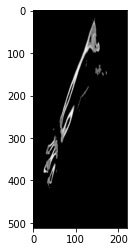

In [73]:
# TODO: YOUR CODE TO SEGMENT BONES
new_m = array_3d[120].copy().astype(np.int16)
new_m[new_m < 1150] = 0
plt.imshow(new_m, cmap='gray')
plt.show()

In [ ]:
# Are the segmentations good?


I think segmentation is good, but it depends on Threshold values or housefield units in this case

In [ ]:
# TODO: YOUR ANSWER

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""